<a href="https://colab.research.google.com/github/zerryberry/C1/blob/master/EDA_my_Take_Home_(Day_4)_Questions_%5Bv2_0_270320%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the dataset (Life Expectancy Data)

The dataset contains the health data of 2938 individuals useful for predicting the life expentency of the individuals. The features are related to economical factors, immunity realted factors, social factors and so on.

Attribute Information:

**Country:** Country of the recorded data

**Year:** Year of the recorded data

**Status:** Status of the country

**Life expectancy:** Life expectancy in age (target/dependent variable)

**Adult mortality:** Rate of adult mortality

**Infant deaths:** Number of Infant Deaths per 1000 population

**Alcohol:** Alcohol consumption (in litres of pure alcohol)

**Percentage expenditure:** Expenditure on health as a percentage of GDP

**Hepatitis B:** Hepatitis B immunization coverage among 1-year-olds (%)

**Measles:** Number of reported cases per 1000 population

**BMI:** Average BMI of entire population

**Under-five deaths:** Number of under-five deaths per 1000 population

**Polio:** Polio immunization coverage among 1-year-olds (%)

**Total expenditure:** Government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria:** DTP3 immunization coverage among 1-year-olds (%)

**HIV/AIDS:** Deaths per 1000 live births HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Thinness 1-19 years:** Prevalence of thinness for age 1 to 19 (%)

**Thinness 5-9 years:** Prevalence of thinness for age 5 to 9 (%)

**Income composition of resources:** Human Development Index in terms of income composition of resources

**Schooling:** Number of years of Schooling

**Import the required libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the life expectancy dataset and print the first five observations

In [4]:
ho= pd.read_csv('/content/Life Expectancy Data.csv')
ho.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599,18.2,18.2,0.454,9.5


In [ ]:
ho.shape

(2938, 22)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Check the data type of each variable and if any variable is wrongly identified, do the needful</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
ho.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult mortality                    float64
Infant deaths                        int64
Alcohol                            float64
Percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
Under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
Thinness  1-19 years               float64
Thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [5]:
ho['Population'].replace({'#':np.nan}, inplace= True)

In [6]:
ho['Population'] = ho['Population'].astype('float64')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Create a DataFrame containing the count and percentage of missing entries in each variable</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
n= ho.shape[0]
dr= {}
for i in ho.columns:
  dr[i] = [ho[i].isna().sum(), ho[i].isna().sum()/n]

In [ ]:
df= pd.DataFrame(dr)
df= df.T
df.rename({0:'total_nan', 1:'% of nan'}, axis=1, inplace= True)
df.head()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3a. Are there any extreme values present in the government's total expenditure on health?
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


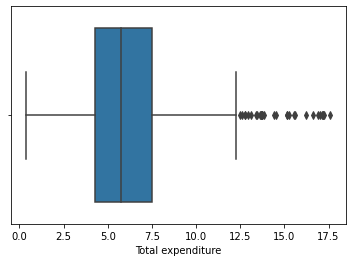

In [18]:
# yes it is. there are extreme values on the right side. Its a right skewed data. 
sns.boxplot(ho['Total expenditure'])
plt.show()

In [27]:
# these are (extreme values)

ul= ho['Total expenditure'].describe()['75%'] + (ho['Total expenditure'].describe()['75%'] - ho['Total expenditure'].describe()['25%'])*1.5
ho.loc[(ho['Total expenditure'] <= ul) & (ho['Total expenditure'] > (ho['Total expenditure'].describe()['75%']))]['Total expenditure'].sort_values()

2497     7.50
1262     7.50
762      7.50
162      7.50
693      7.50
        ...  
1707    11.99
1709    12.11
1385    12.23
1384    12.24
2307    12.25
Name: Total expenditure, Length: 646, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3b. Remove the outliers present in 'Total expenditure' using the quartiles of the variable	
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
q1= ho['Total expenditure'].quantile(0.25)
q3= ho['Total expenditure'].quantile(0.75)
iqr= q3-q1
ul= q3 + 1.5*iqr
ll= q1 - 1.5*iqr

rt= ho[(ho['Total expenditure'] > ul) | (ho['Total expenditure'] < ll)]['Total expenditure'].values

In [ ]:
ho['aft'] = [ho['Total expenditure'][i] if ho['Total expenditure'][i] not in rt else np.nan for i in range(len(ho['Total expenditure']))]

In [ ]:
ho['Total expenditure'].isna().sum()

226

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Split the data such that 'X' will contain all the indepentdent variables and 'y' will contain the target variable</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Hint:** 'Life expectancy' is the target variable depending on the remaining variables.

In [28]:
ho.head()

,Country,Year,Status,Life expectancy,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [29]:
x= ho.loc[:, ho.columns != 'Life expectancy']
x.head()

,Country,Year,Status,Adult mortality,Infant deaths,Alcohol,Percentage expenditure,Hepatitis B,Measles,BMI,Under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [30]:
y= ho['Life expectancy']

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Split the independent variables into two sets with the proportion of 70:30</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
print(0.7*ho.shape[0])

2056.6


In [43]:
a= ho.iloc[:2056, :]
b= ho.iloc[2056:, :]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. How would you treat the missing values in the variable 'GDP'?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


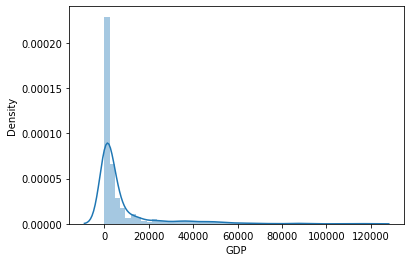

In [45]:
sns.distplot(ho['GDP'])
plt.show()


# we can see its a right skewed, so we treat it using median / or conditional nan treatment 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.There are 16 observations for which the status of the corresponding country is unknown, impute this status with an appropriate values</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
ho.loc[ho['Status'].isna()]

In [94]:
# we use ffill, coz they are alphabetically arranged. 

ho['Status']= ho['Status'].ffill()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Define a function to find the extreme values in alcohol consumption
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


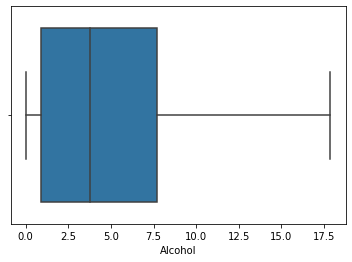

In [99]:
sns.boxplot(ho['Alcohol'])

In [97]:
def func():
  ul= ho['Alcohol'].describe()['75%'] + (ho['Alcohol'].describe()['75%'] - ho['Alcohol'].describe()['25%'])*1.5
  return ho.loc[(ho['Alcohol'] <= ul) & (ho['Alcohol'] > (ho['Alcohol'].describe()['75%']))]['Alcohol'].sort_values() 

In [ ]:
func()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Create a column 'Life_expectancy_level' such that it will contain three levels (High, Medium, Low) based on the life expectancy </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [109]:
ho['life_expectncy'] = pd.cut(ho['Life expectancy'], bins=[0,36, 54, 72], labels=['low', 'medium', 'high'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Check how life expectancy has changed over the years in China</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [113]:
x= ho.loc[ho['Country']== 'China']['Year']
y= ho.loc[ho['Country']== 'China']['Life expectancy']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


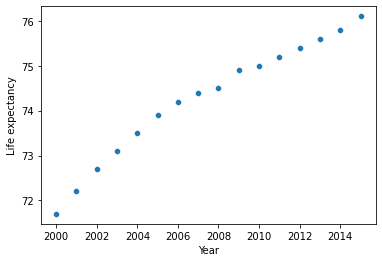

In [114]:
sns.scatterplot(x,y)